# Decision Tree

In [ ]:
#ML Model to predict risk of Cardiovascular diseases

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Katie Chan CWS/" #location of data folder

In [ ]:
#from kaggle - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
data = os.path.join(path, "cardio_train.csv") #location of the data set in Drive

In [ ]:
df = pd.read_csv(data, sep=";") #sep = ";" is used to seperate the columns of the dataframe
df

#objectual
#age - in days
#gender - 1:Women, 2:Men
#height - cm
#weight - kgs

#medical tests
#ap_hi and ap_lo - Systolic and Diastolic Pressure
#cholesterol - 1:normal, 2:above normal, 3:well above normal
#glucose - 1:normal, 2:above normal, 3:well above normal

#subjective
#smoke - 0:notsmoke, 1:smoke
#alco - 0:does not drink, 1:drinks
#active - 0:not physically active, 1:active


#target variable
#cardio - 0:does not, 1:has disease

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df["age"] = df["age"].apply(lambda num:num//365)
df #changes age to year wise

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.isnull().sum() #no empty values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#pick relevant features
df_new = df.drop(["id"], axis=1)
df_new

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df_new["BMI"] = 0
df_new["BMI"] = round(df_new["weight"]/((df_new["height"]/100)**2),2)
df_new

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.93
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.47
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.35
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.10


In [ ]:
df_new.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

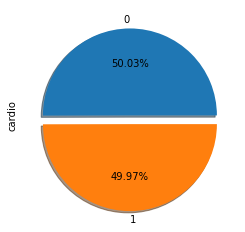

In [ ]:
df_new.cardio.value_counts().plot.pie(autopct="%.2f%%",explode=[0,0.1], shadow=True)
#the data set is about 50-50, 50 positive for cvd and 50 negative for cvd

In [ ]:
df_new.gender.value_counts()
#more women, than men in the dataset

1    45530
2    24470
Name: gender, dtype: int64

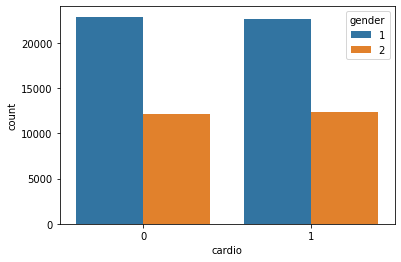

In [ ]:
sns.countplot(data= df_new, x="cardio",hue="gender")
#ratio of women:men who have and do not have cvd is roughly the same

In [ ]:
df_new.groupby(["gender","cardio"])["cardio"].count() #groupby categorical data are put on the rows, numeric data are placed on the columns

gender  cardio
1       0         22914
        1         22616
2       0         12107
        1         12363
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


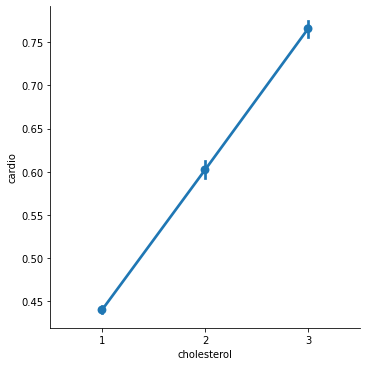

In [ ]:
sns.factorplot(data=df_new, x="cholesterol", y="cardio")
#higher the cholesterol higher number of peoeple with cvd

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


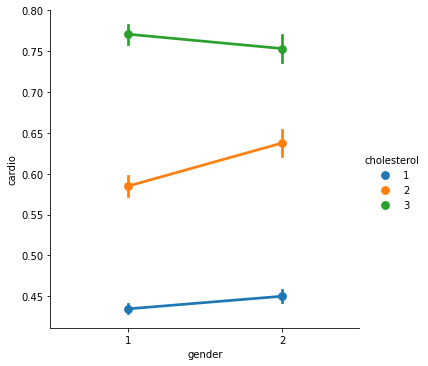

In [ ]:
sns.factorplot(data=df_new, x="gender", y="cardio", hue = "cholesterol")
#number of males and females witht the roughly similar levels of cholesterol have similar number of cvd +ves

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


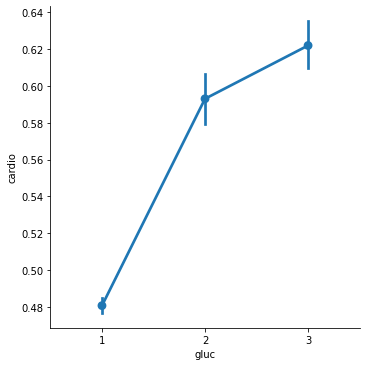

In [ ]:
sns.factorplot(data=df_new, x="gluc", y="cardio")
#higher the blood glucose higher number of peoeple with cvd

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


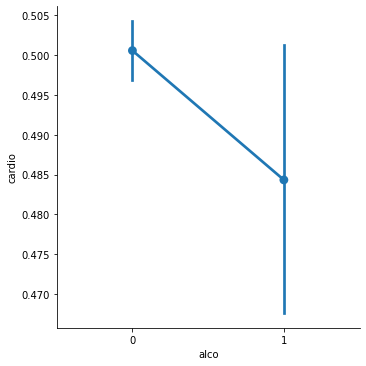

In [ ]:
sns.factorplot(data=df_new, x="alco", y="cardio")
#higher the cholesterol higher number of peoeple with cvd

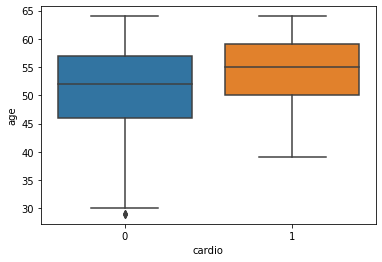

In [ ]:
sns.boxplot(data=df_new, x="cardio", y="age")
#number of males and females witht the roughly similar levels of cholesterol have similar number of cvd +ves

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


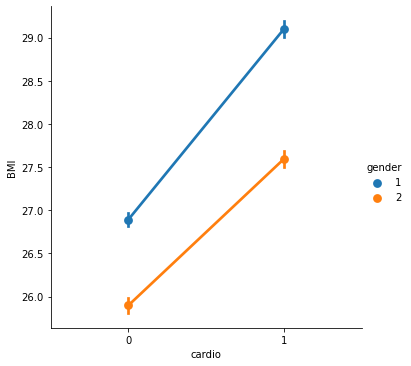

In [ ]:
sns.factorplot(data=df_new, x="cardio", y="BMI", hue="gender")
#higher BMI has a very clear indication of higher Risk of CVD
#risk of high BMI females is greater than high BMI males

In [ ]:
# Independent and Depent Variables split

x = df_new.drop(["cardio", "height"], axis =1)
y = pd.DataFrame(df_new["cardio"])

In [ ]:
x

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,50,2,62.0,110,80,1,1,0,0,1,21.97
1,55,1,85.0,140,90,3,1,0,0,1,34.93
2,51,1,64.0,130,70,3,1,0,0,0,23.51
3,48,2,82.0,150,100,1,1,0,0,1,28.71
4,47,1,56.0,100,60,1,1,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,76.0,120,80,1,1,1,0,1,26.93
69996,61,1,126.0,140,90,2,2,0,0,1,50.47
69997,52,2,105.0,180,90,3,1,0,1,0,31.35
69998,61,1,72.0,135,80,1,2,0,0,0,27.10


In [ ]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


## Model Building and Training

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

In [ ]:
# Select a model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instantiate
dtree= DecisionTreeClassifier()

In [ ]:
# Training / Fitting
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction

In [ ]:
# Prediction
y_pred = dtree.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6366071428571428


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,6845,3762
1,3892,6501


## Visualization

In [ ]:
from sklearn import tree

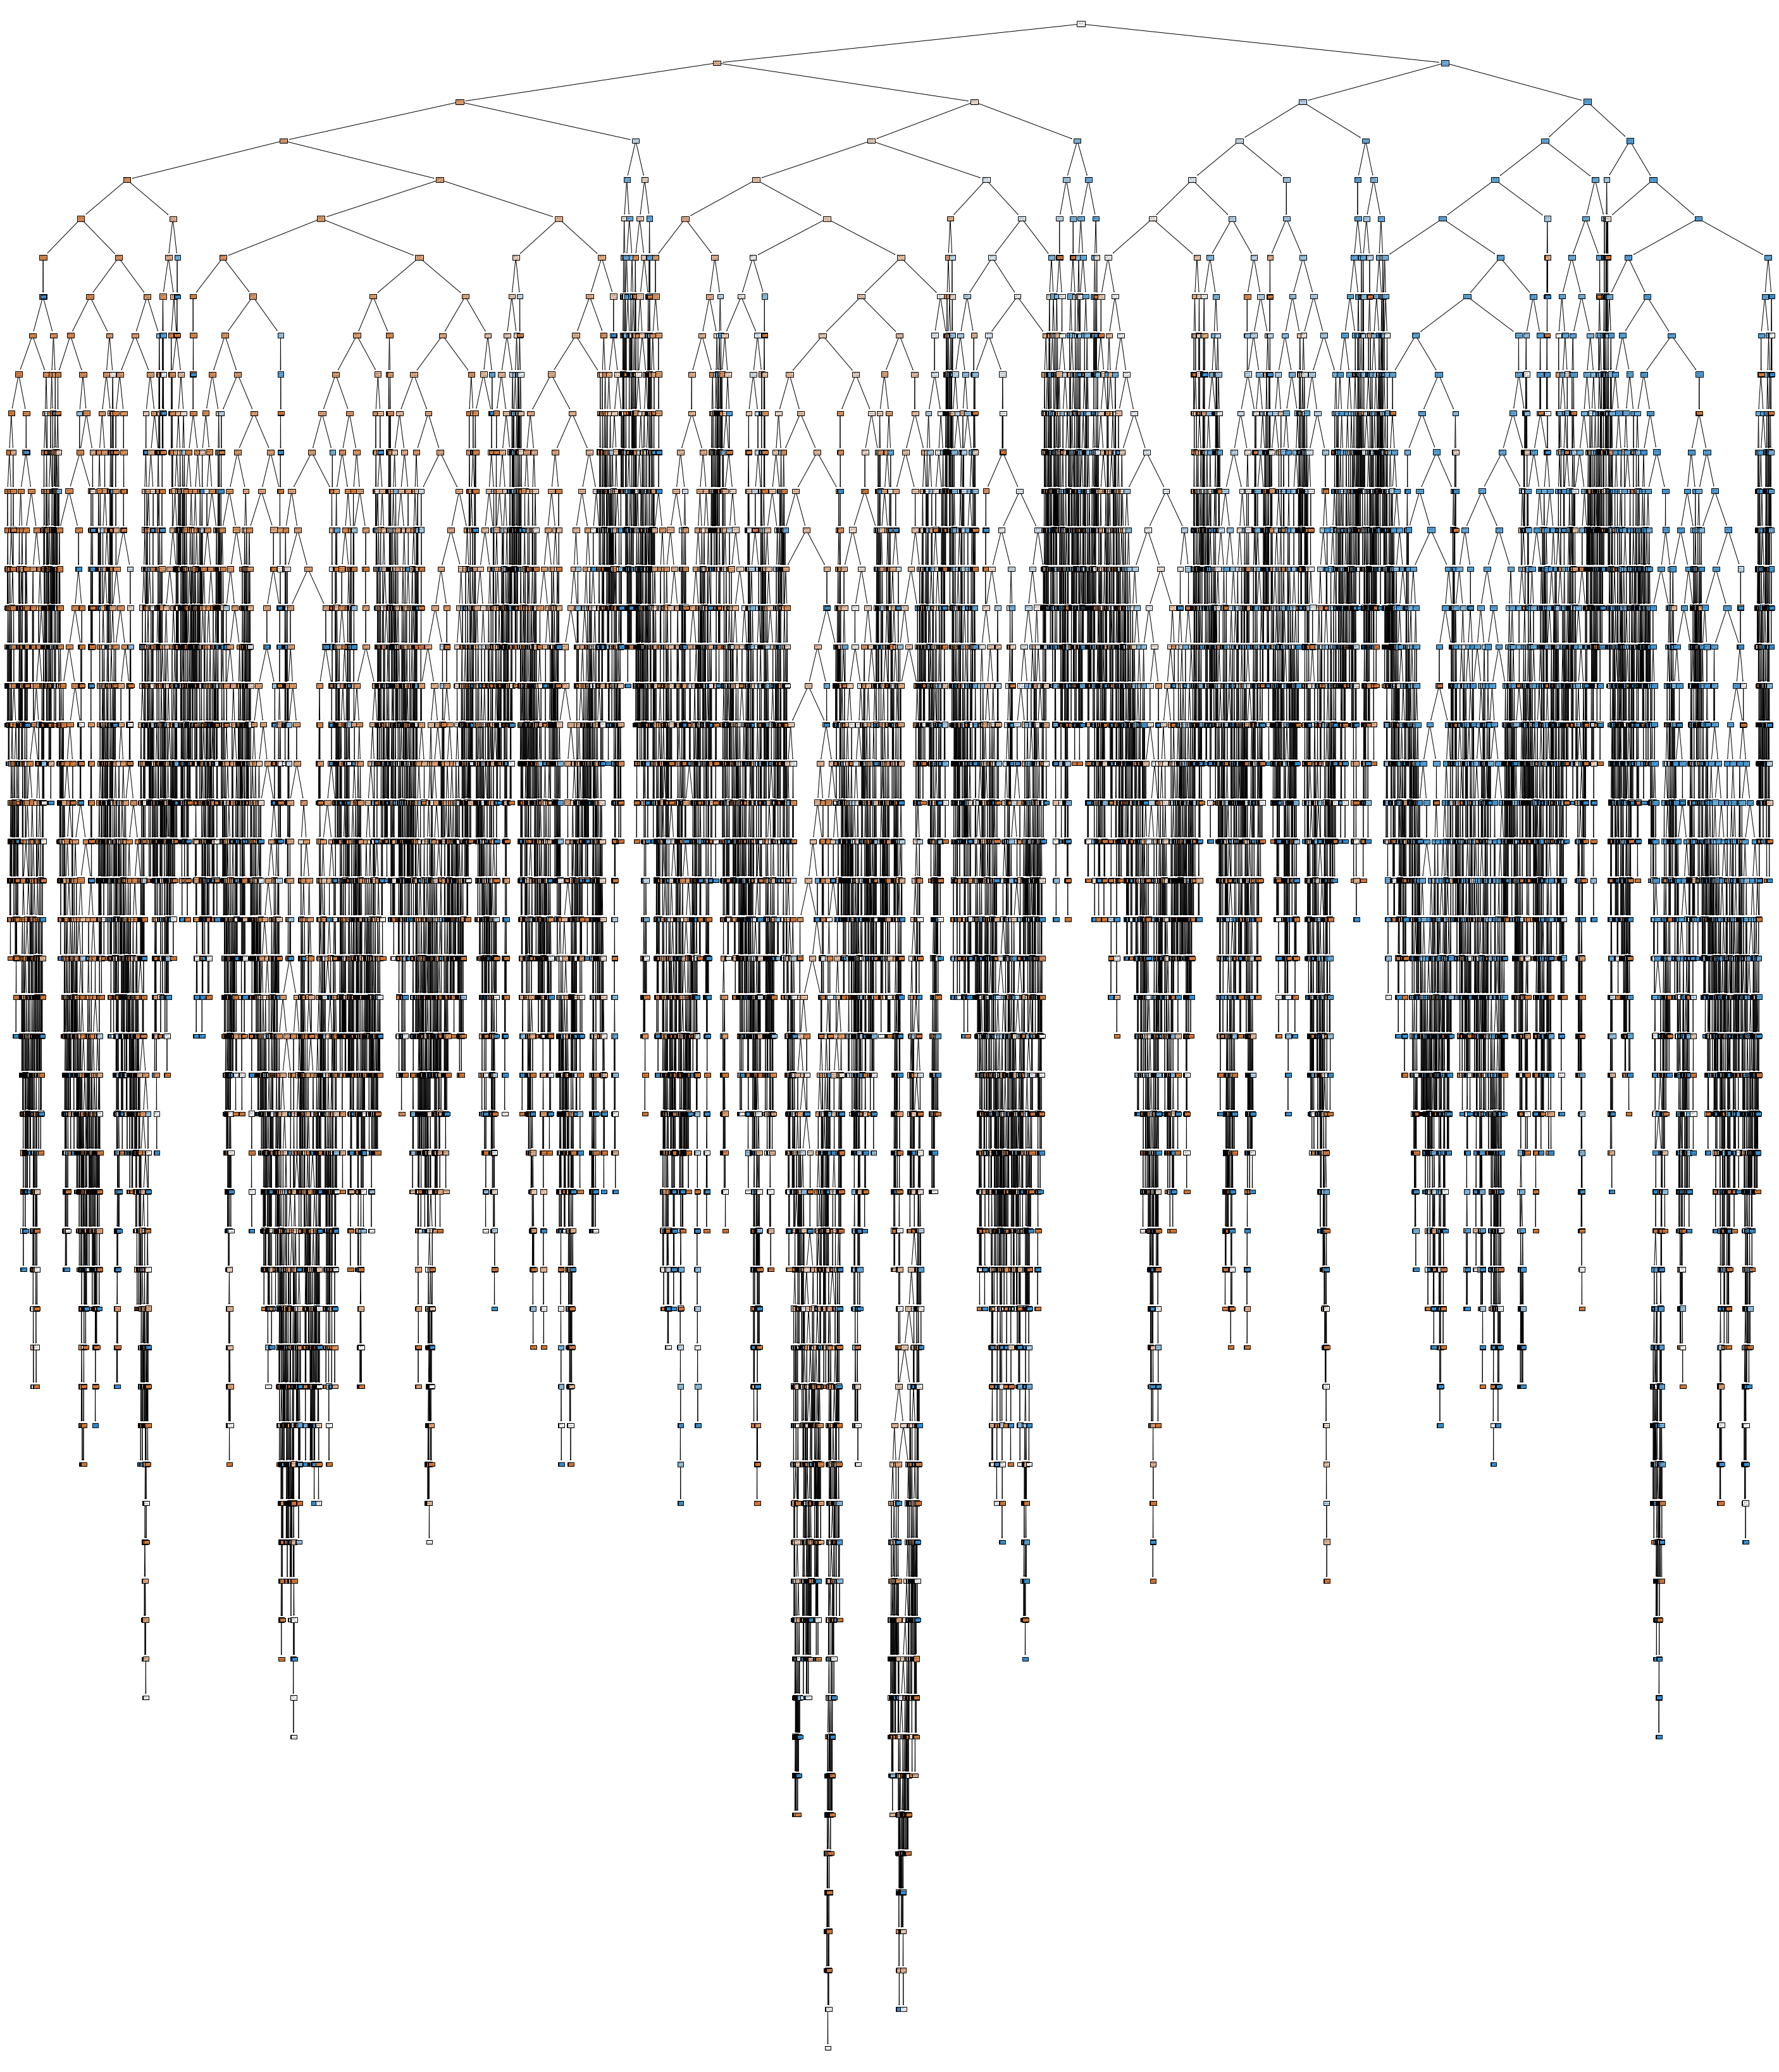

In [ ]:
# showing with columns and class name
plt.figure(figsize=(50,60))
tree.plot_tree(dtree, feature_names = x.columns, 
               class_names = ["negative","positive"], 
               filled = True)
plt.show()

# Random Forest